In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA


### 1. Initial Data Understanding
- Data Loading and Inspection
- Data Types
- Missing Values
- Duplicates

In [2]:
data= pd.read_csv('../data/Virtual_Reality_in_Education_Dataset.csv')
data.head(10)

,Age,Grade_Level,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Instructor_VR_Proficiency,Access_to_VR_Equipment,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR
0,13,Postgraduate,Yes,8,5,Yes,Beginner,No,Low,Yes
1,16,Undergraduate,No,3,1,No,Intermediate,Yes,Low,No
2,15,High School,Yes,0,1,Yes,Advanced,Yes,Low,No
3,24,Postgraduate,Yes,10,4,Yes,Advanced,No,Low,Yes
4,22,Undergraduate,Yes,10,4,No,Intermediate,Yes,Low,Yes
5,28,High School,No,4,1,No,Advanced,Yes,Medium,Yes
6,19,Undergraduate,Yes,5,1,Yes,Intermediate,Yes,Low,No
7,19,High School,Yes,10,5,Yes,Beginner,No,Medium,Yes
8,29,Undergraduate,Yes,3,1,Yes,Advanced,Yes,Medium,No
9,16,Postgraduate,No,11,4,Yes,Intermediate,Yes,Low,Yes


In [3]:
data.shape

(5000, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Age                               5000 non-null   int64 
 1   Grade_Level                       5000 non-null   object
 2   Usage_of_VR_in_Education          5000 non-null   object
 3   Hours_of_VR_Usage_Per_Week        5000 non-null   int64 
 4   Engagement_Level                  5000 non-null   int64 
 5   Improvement_in_Learning_Outcomes  5000 non-null   object
 6   Instructor_VR_Proficiency         5000 non-null   object
 7   Access_to_VR_Equipment            5000 non-null   object
 8   Stress_Level_with_VR_Usage        5000 non-null   object
 9   Collaboration_with_Peers_via_VR   5000 non-null   object
dtypes: int64(3), object(7)
memory usage: 390.8+ KB


In [5]:
data.isna().sum()

Age                                 0
Grade_Level                         0
Usage_of_VR_in_Education            0
Hours_of_VR_Usage_Per_Week          0
Engagement_Level                    0
Improvement_in_Learning_Outcomes    0
Instructor_VR_Proficiency           0
Access_to_VR_Equipment              0
Stress_Level_with_VR_Usage          0
Collaboration_with_Peers_via_VR     0
dtype: int64

In [6]:
data.duplicated().sum()

159

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(4841, 10)

### 2. Basic Statistical Overview
- Summary Statistics (`describe()`, `value_counts()`)
- Zero and Constant Values

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4841.0,21.166288,5.468791,12.0,16.0,21.0,26.0,30.0
Hours_of_VR_Usage_Per_Week,4841.0,5.492873,4.231425,0.0,2.0,5.0,8.0,37.0
Engagement_Level,4841.0,2.478620,1.485052,1.0,1.0,2.0,4.0,5.0


In [10]:
data.select_dtypes(include='object').describe()

,Grade_Level,Usage_of_VR_in_Education,Improvement_in_Learning_Outcomes,Instructor_VR_Proficiency,Access_to_VR_Equipment,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR
count,4841,4841,4841,4841,4841,4841,4841
unique,3,2,2,3,2,3,2
top,Undergraduate,Yes,Yes,Beginner,Yes,Medium,No
freq,1630,3863,3086,1943,3830,1820,2493


In [11]:
data['Grade_Level'].unique()

array(['Postgraduate', 'Undergraduate', 'High School'], dtype=object)

In [12]:
for col in data.select_dtypes(include='object'):
    print(f'{col}: {data[col].unique()}')
    print(F'{data[col].value_counts()}')
    print('---------------------------------------------------------')

Grade_Level: ['Postgraduate' 'Undergraduate' 'High School']
Grade_Level
Undergraduate    1630
High School      1615
Postgraduate     1596
Name: count, dtype: int64
---------------------------------------------------------
Usage_of_VR_in_Education: ['Yes' 'No']
Usage_of_VR_in_Education
Yes    3863
No      978
Name: count, dtype: int64
---------------------------------------------------------
Improvement_in_Learning_Outcomes: ['Yes' 'No']
Improvement_in_Learning_Outcomes
Yes    3086
No     1755
Name: count, dtype: int64
---------------------------------------------------------
Instructor_VR_Proficiency: ['Beginner' 'Intermediate' 'Advanced']
Instructor_VR_Proficiency
Beginner        1943
Intermediate    1935
Advanced         963
Name: count, dtype: int64
---------------------------------------------------------
Access_to_VR_Equipment: ['No' 'Yes']
Access_to_VR_Equipment
Yes    3830
No     1011
Name: count, dtype: int64
---------------------------------------------------------
Stress_Leve

### 3. Distribution of Variables
- Numerical Features (histograms, KDE)
- Categorical Features (bar plots, check imbalancement)
- Outlier detection

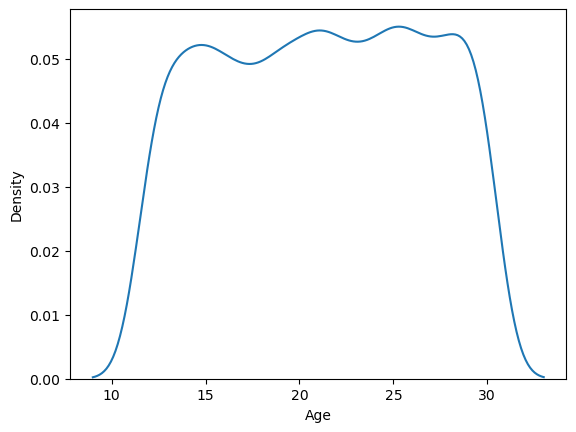

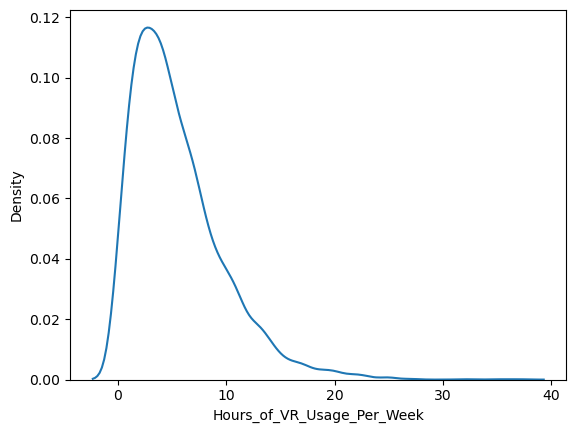

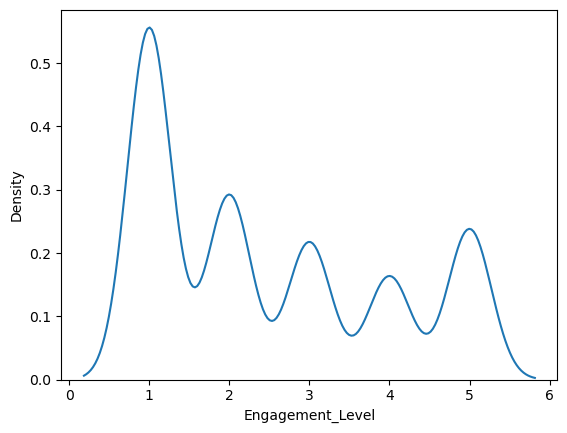

In [13]:
for col in data.select_dtypes('number').columns:
    sns.kdeplot(data[col])
    plt.show()

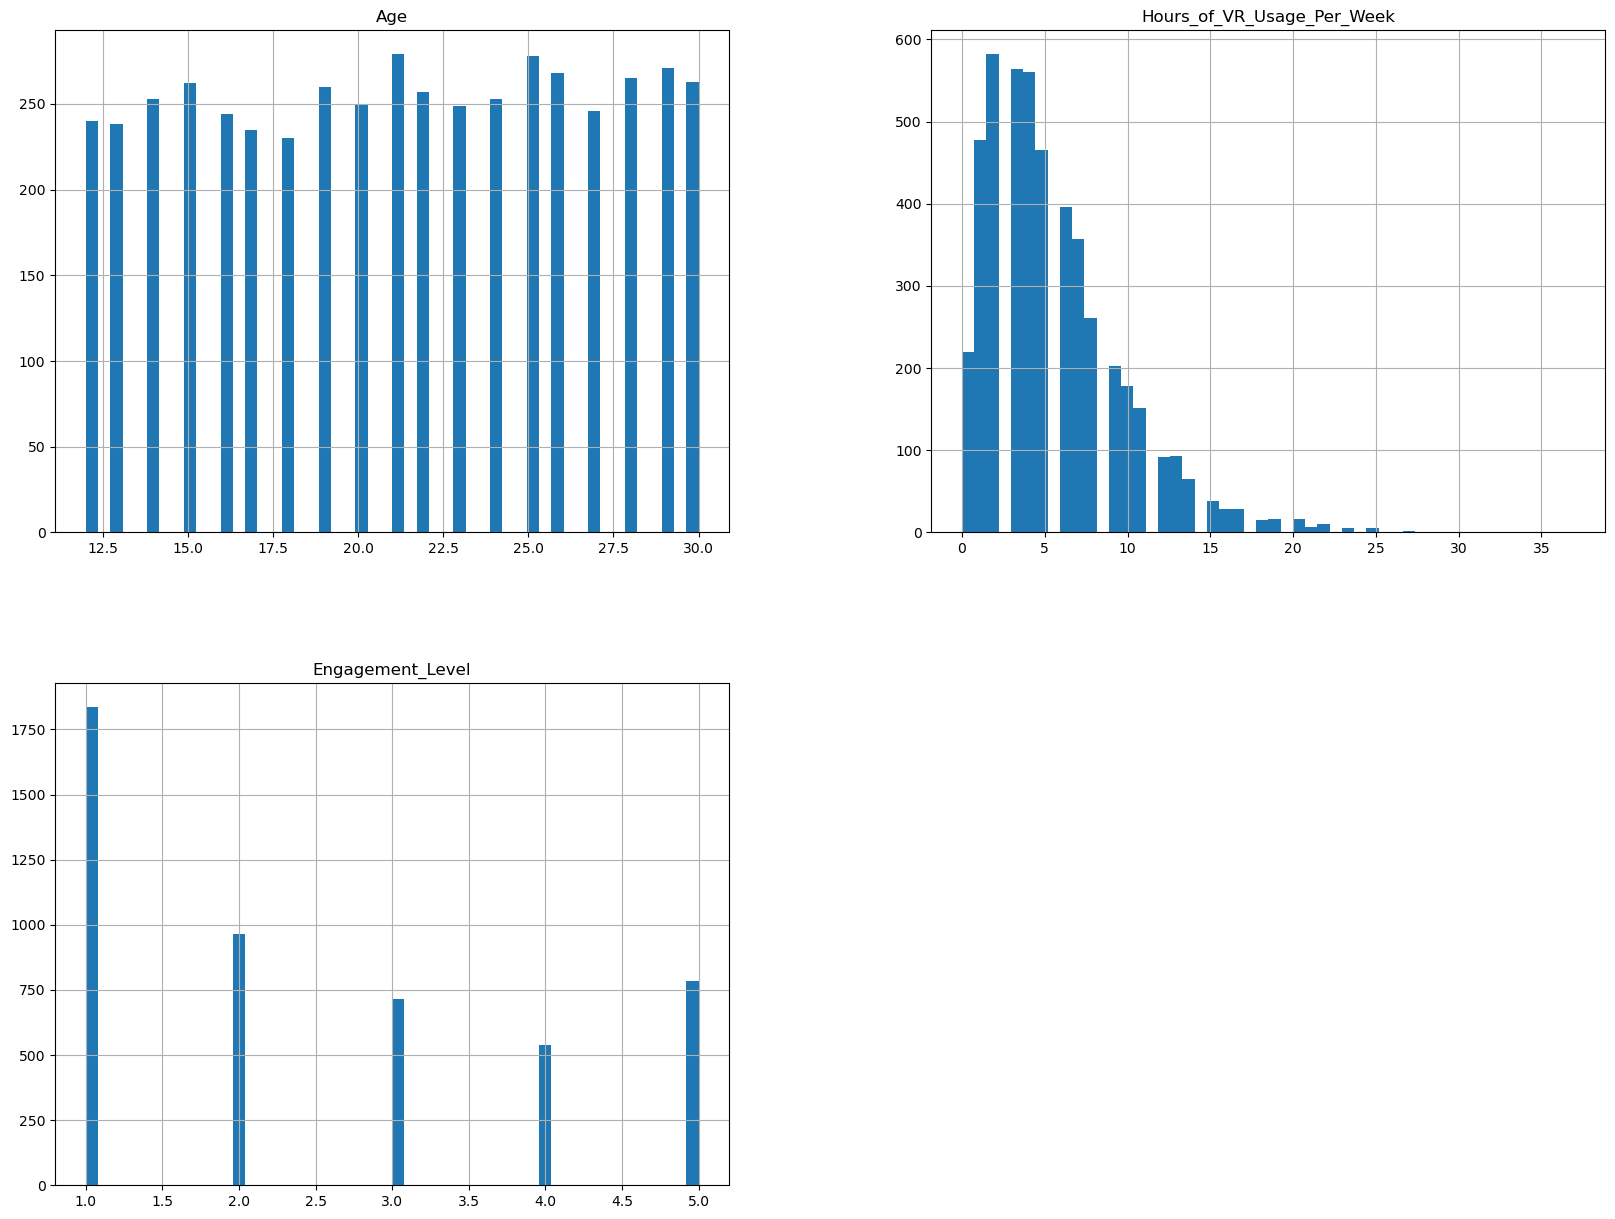

In [14]:
data.hist(bins=50, figsize=(20,15));

### 4. Correlations
- Numerical Correlations (`corr()`)
- Categorical Correlations

In [15]:
corr_matrix = data.corr(numeric_only=True)

<Axes: >

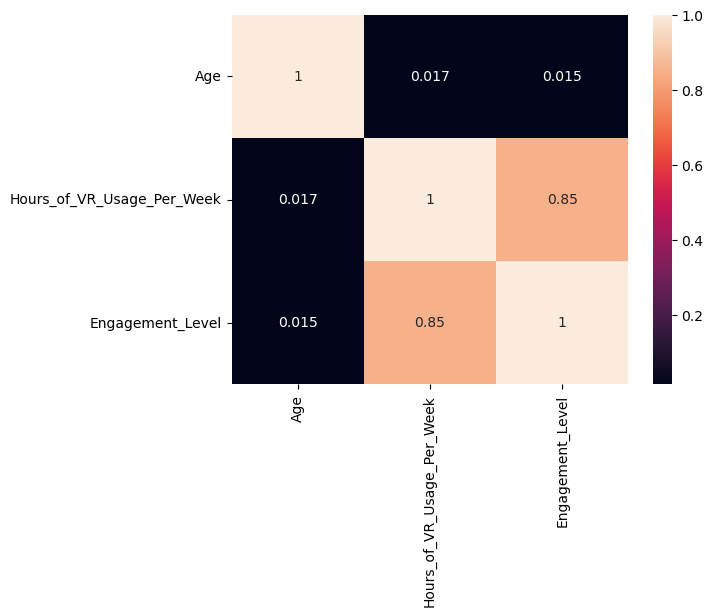

In [16]:
sns.heatmap(corr_matrix, annot=True)

In [17]:
corr_matrix["Engagement_Level"].sort_values(ascending=False)

Engagement_Level              1.000000
Hours_of_VR_Usage_Per_Week    0.850694
Age                           0.014875
Name: Engagement_Level, dtype: float64

### 5. Feature Interactions
- Scatter Plots

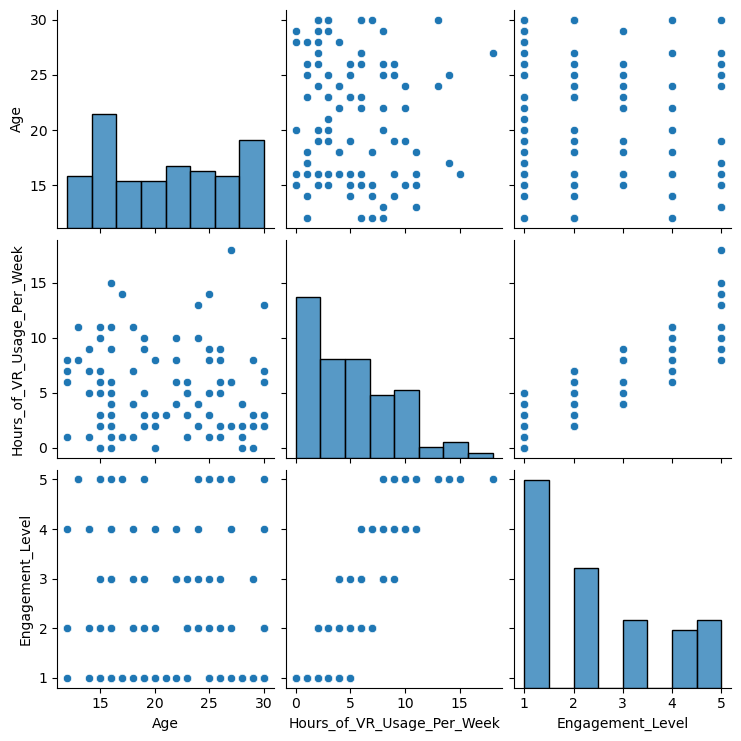

In [18]:
sns.pairplot(data[:100])

<Axes: ylabel='Engagement_Level'>

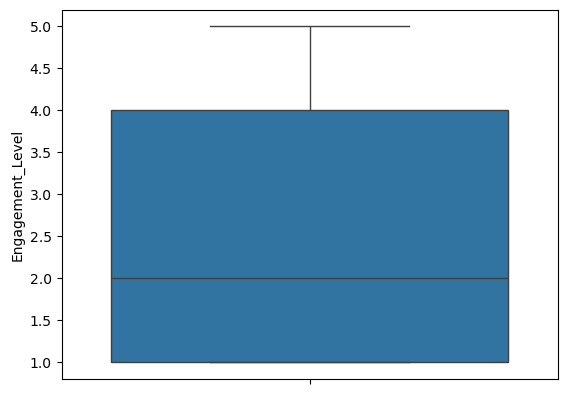

In [19]:
sns.boxplot(data['Engagement_Level'])

### 6. Target Variable Analysis
- Distribution of Target Variable (for class imbalance, decide if resampling or weighting is needed)
- Relationship with Predictors (scatter plots, box plots against the target)

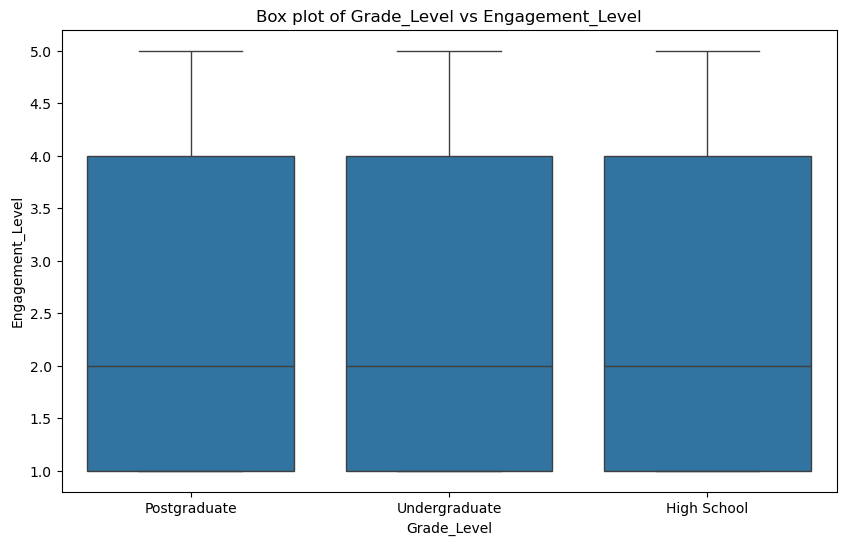

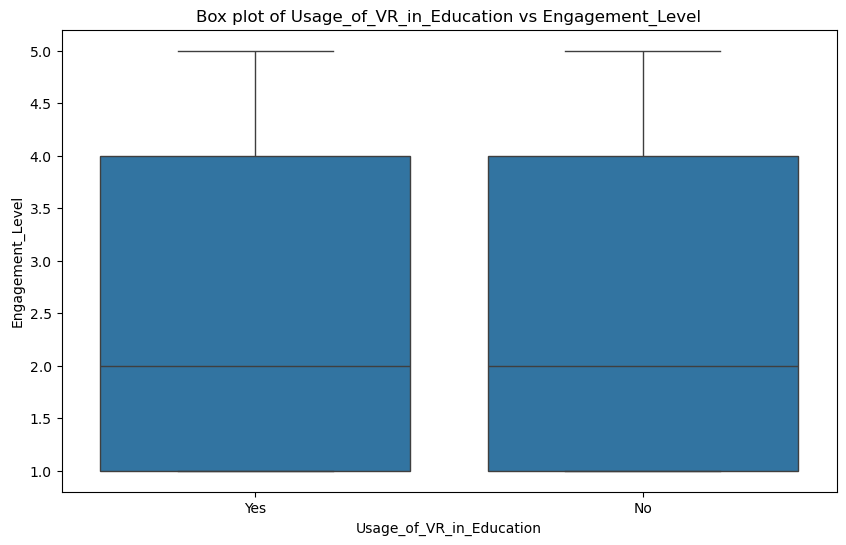

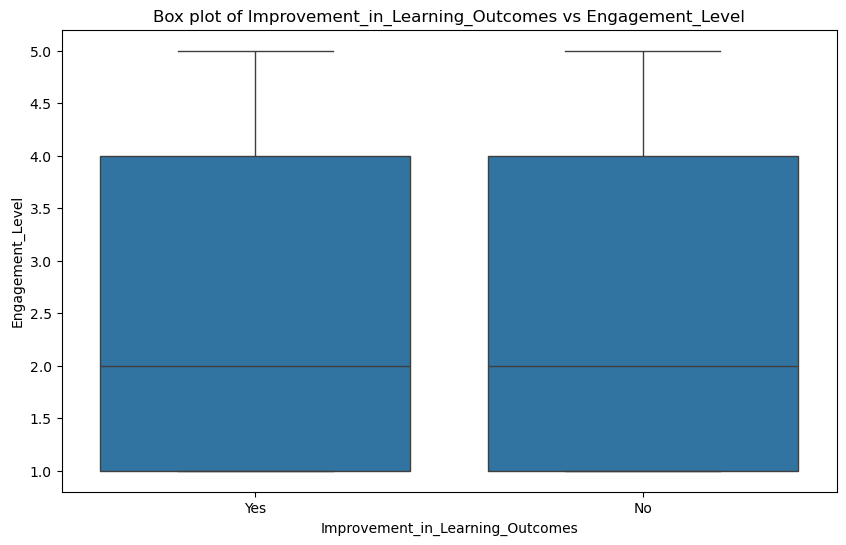

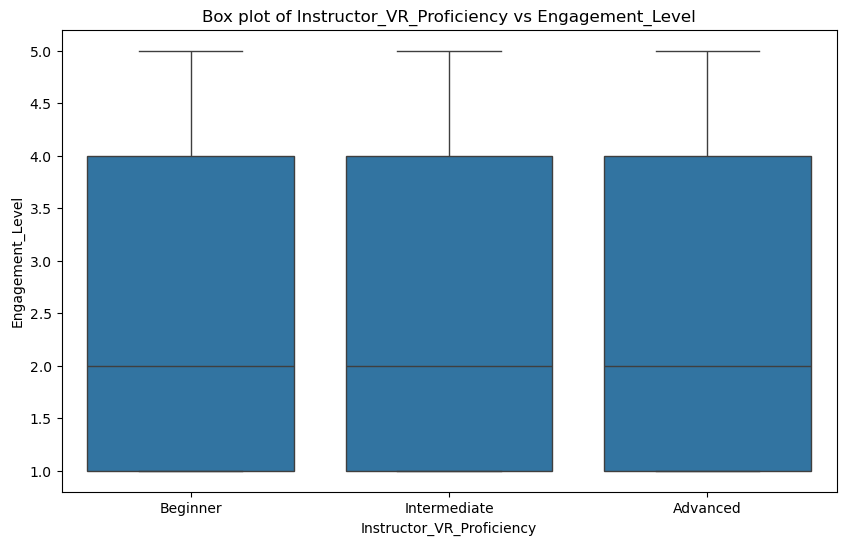

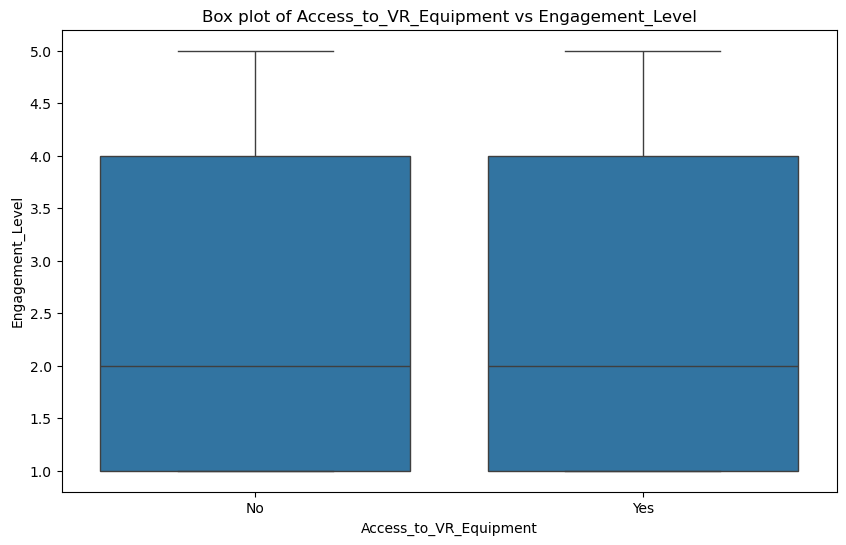

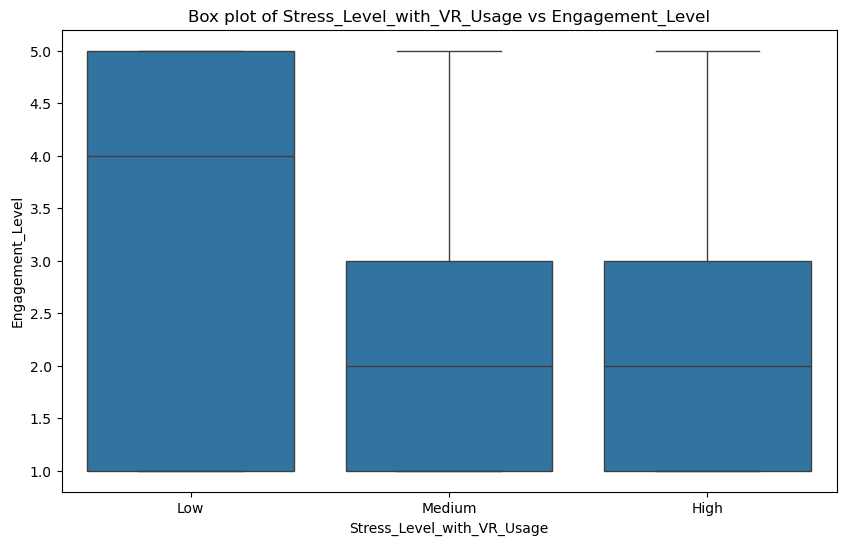

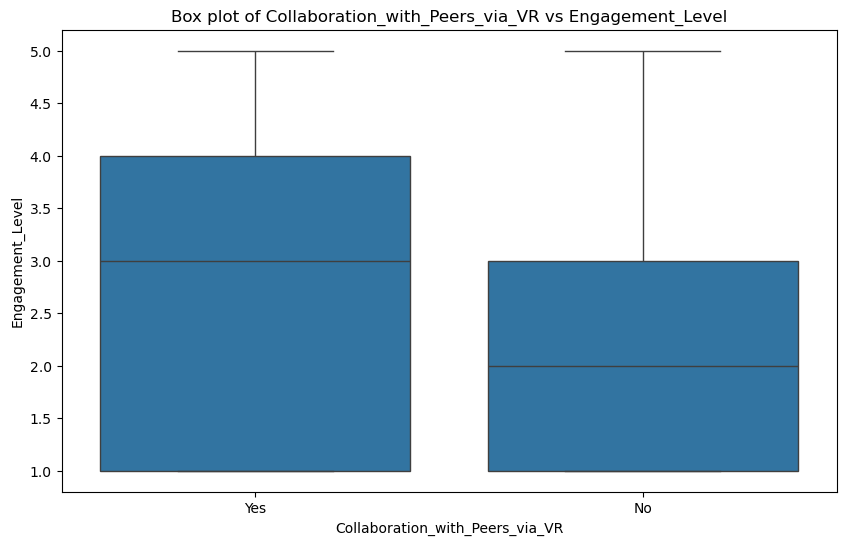

In [20]:
for col in data.select_dtypes('object'):
    top_categories = data[col].value_counts().index[:10]
    filtered_df = data[data[col].isin(top_categories)]
    
    plt.figure(figsize=(10,6))
    sns.boxplot(x=filtered_df[col], y=filtered_df['Engagement_Level'])
    plt.title(f'Box plot of {col} vs Engagement_Level')

### 7. Save Data 
- Save Data to New Excel

In [21]:
data.to_csv('../data/data.csv',index=False)